# Voice Classification Data - Male/Female

In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\ysaru\\Desktop\\Datasets\\voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [5]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


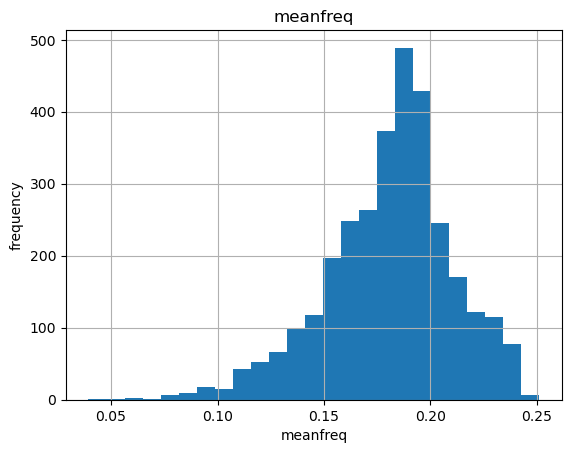

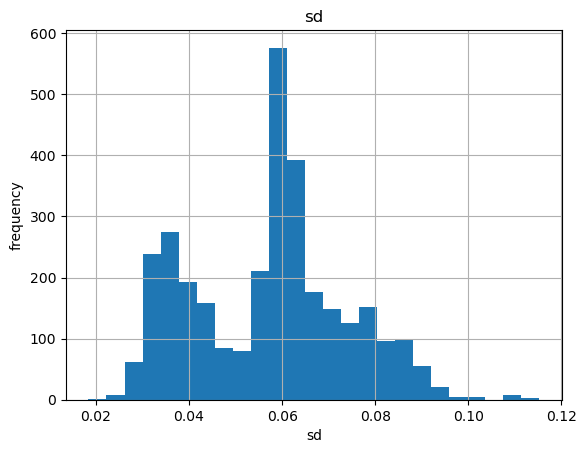

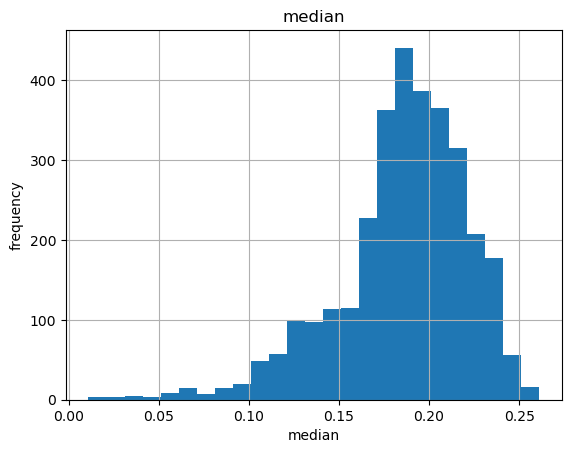

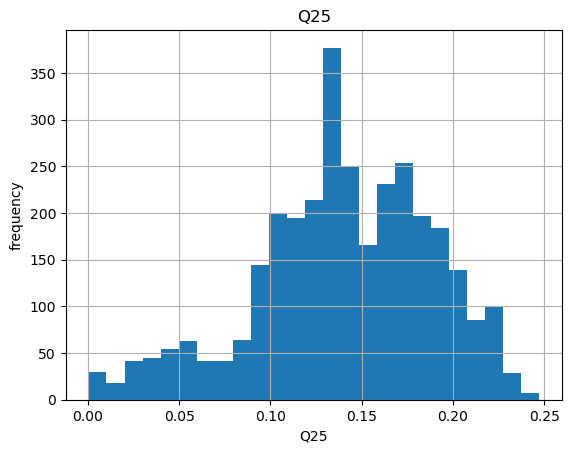

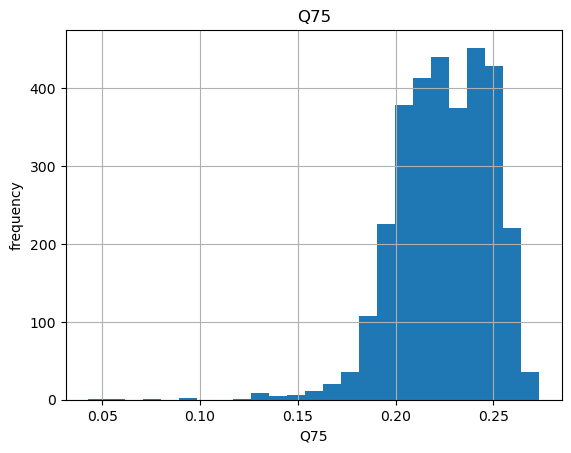

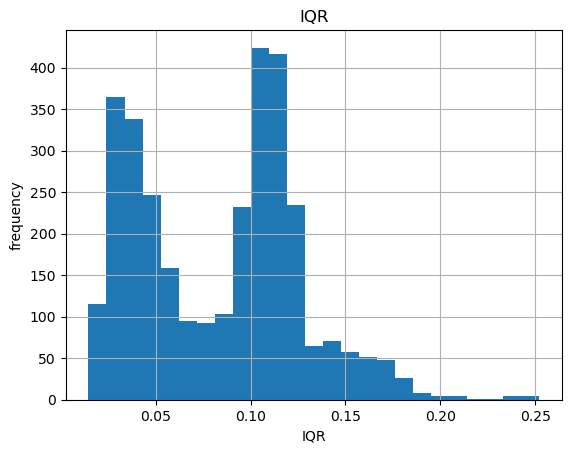

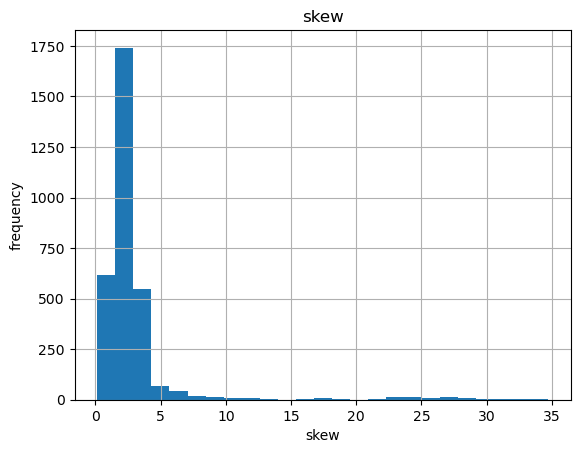

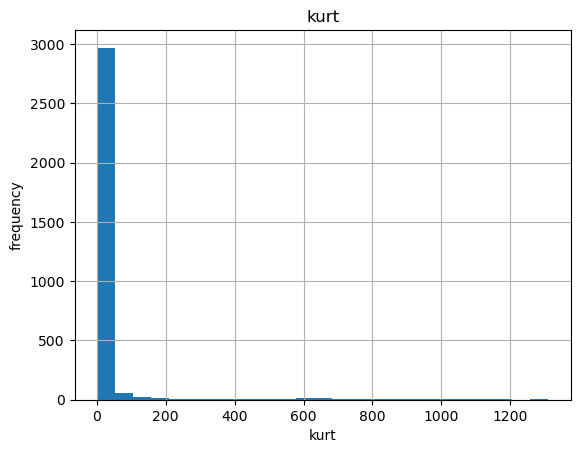

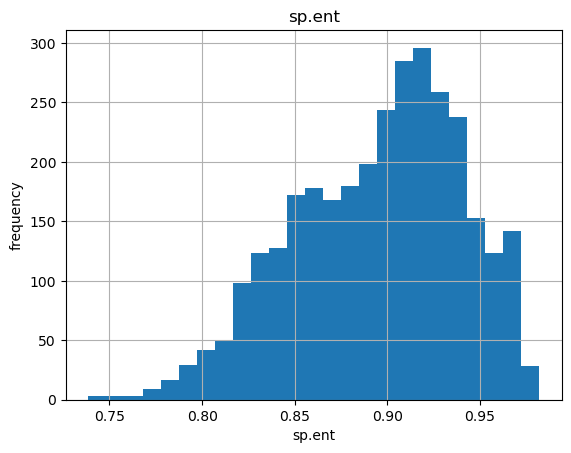

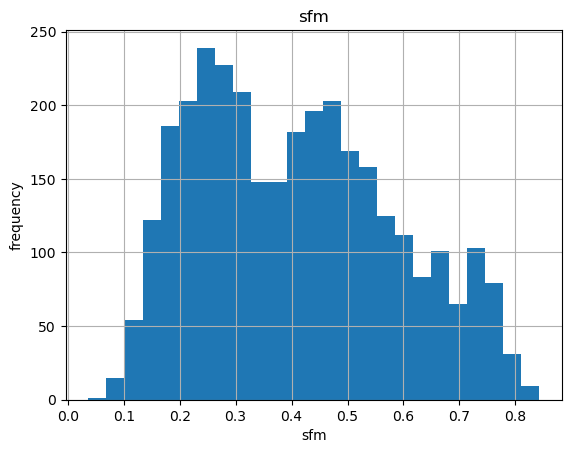

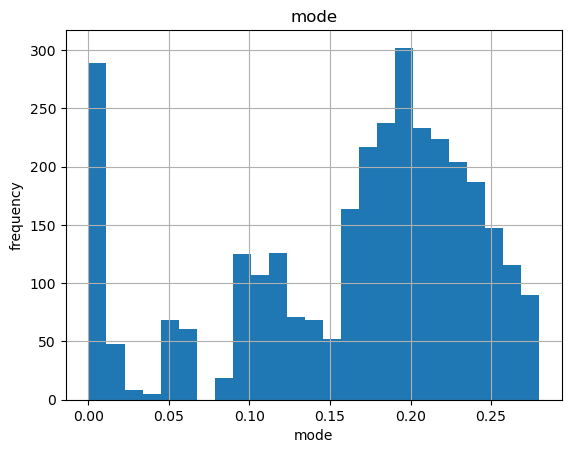

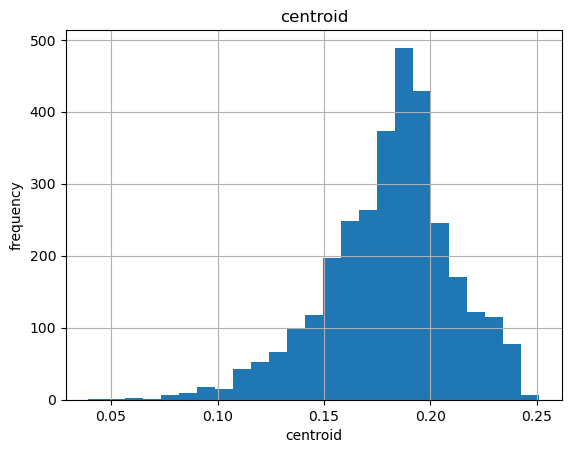

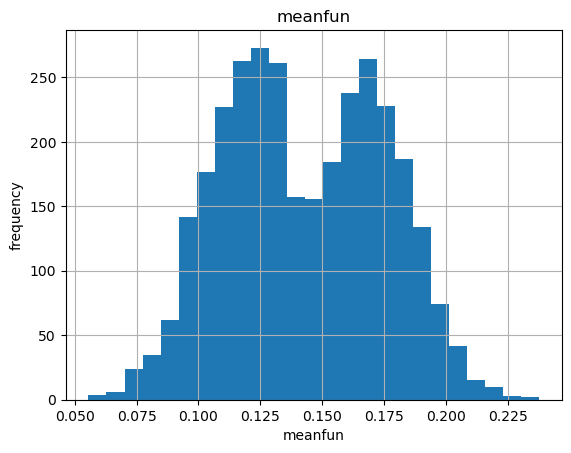

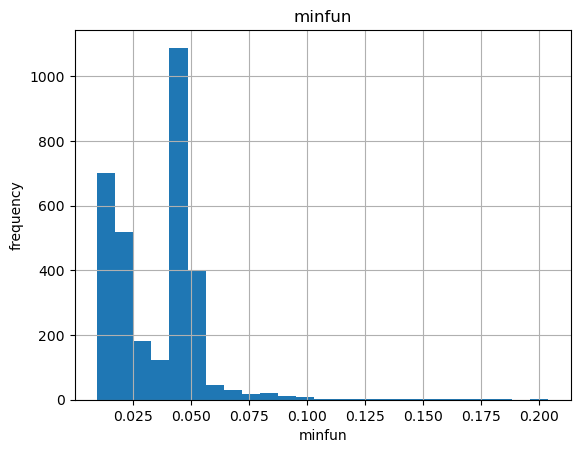

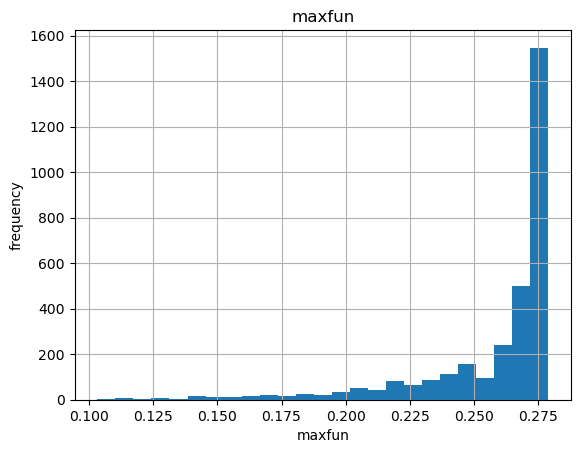

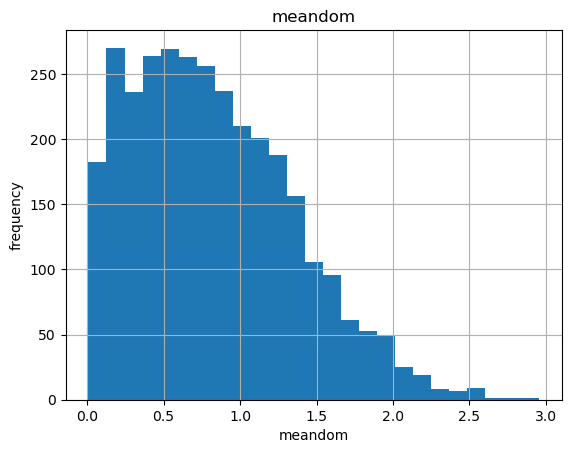

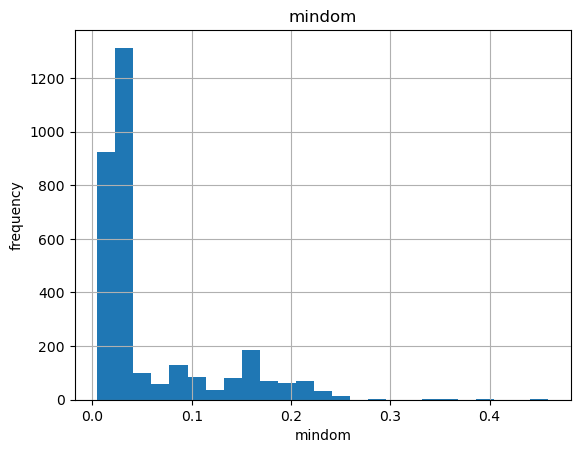

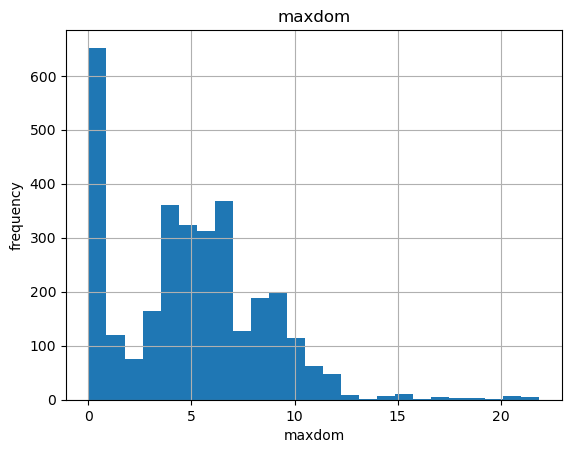

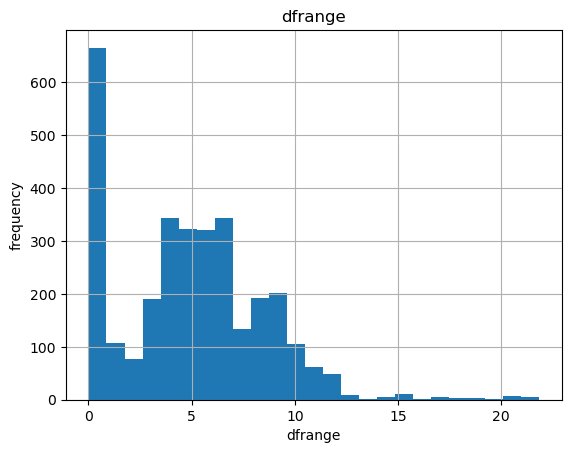

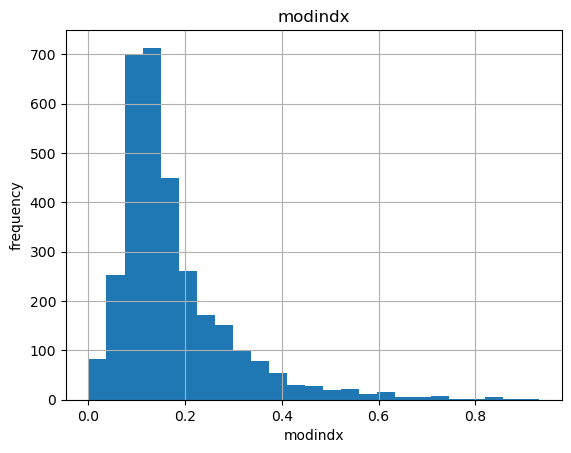

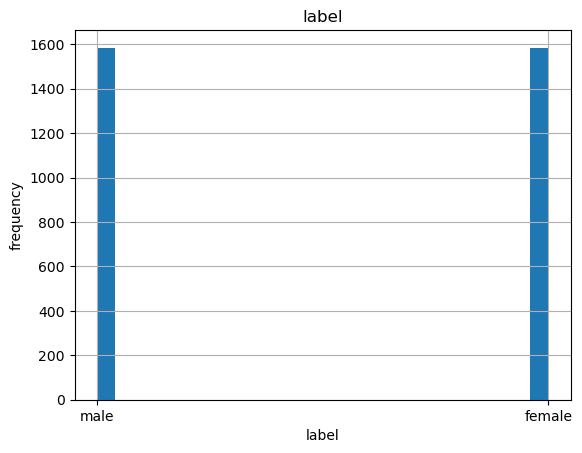

In [6]:
for x in df.columns:
    df1 = df.copy()
    df1[x].hist(bins=25)
    plt.xlabel(x)
    plt.ylabel('frequency')
    plt.title(x)
    plt.show()

In [7]:
'''features = [x for x in df.columns if df[x].dtype !='O']
for x in features:
    df1 = df.copy()
    if 0 in df1[x].unique():
        pass
    else:
        df1[x] = np.log(df1[x])
        df1.boxplot(column=x)
        plt.show()'''

"features = [x for x in df.columns if df[x].dtype !='O']\nfor x in features:\n    df1 = df.copy()\n    if 0 in df1[x].unique():\n        pass\n    else:\n        df1[x] = np.log(df1[x])\n        df1.boxplot(column=x)\n        plt.show()"

In [6]:
X = df.iloc[:,:-1]
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [7]:
from sklearn.preprocessing import LabelEncoder

y = df.iloc[:,-1]
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [10]:
svc = SVC()
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(Y_test, y_pred)))

Accuracy: 0.9763406940063092


In [11]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(svc, X, y, cv=10, train_sizes=np.linspace(0.1,1.0,5), scoring='accuracy')

In [12]:
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

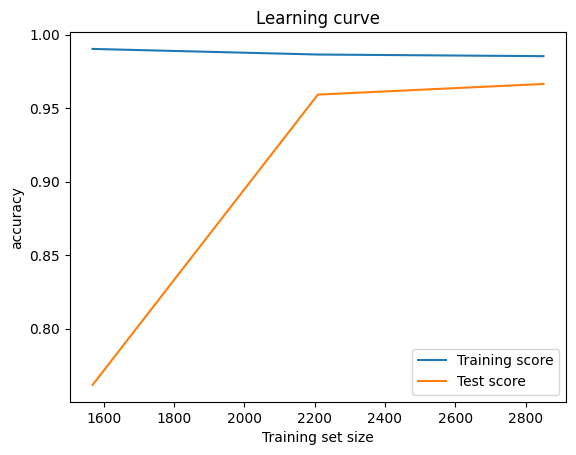

In [13]:
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Test score')
plt.xlabel('Training set size')
plt.ylabel('accuracy')
plt.title('Learning curve')
plt.legend()
#plt.ylim(0,1)
plt.show()

In [14]:
svc = SVC(kernel = 'linear')
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.9779179810725552


In [15]:
k = ['linear', 'rbf', 'poly']

for i in k:
    svc = SVC(kernel = i)
    svc.fit(X_train,Y_train)
    y_pred = svc.predict(X_test)
    print(i, accuracy_score(Y_test,y_pred))

linear 0.9779179810725552
rbf 0.9763406940063092
poly 0.9589905362776026


# k-fold cross validation to test model accuracy

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
for i in k:
    svc = SVC(kernel = i)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    print("accuracy of {} model is {}".format(i, np.mean(scores)*100))
    #print(scores)

accuracy of linear model is 96.96991175178692
accuracy of rbf model is 96.65325639899376
accuracy of poly model is 94.50654873617378


## C Parameter
The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

Thus for a very large values we can cause overfitting of the model and for a very small value of C we can cause underfitting.Thus the value of C must be chosen in such a manner that it generalised the unseen data well

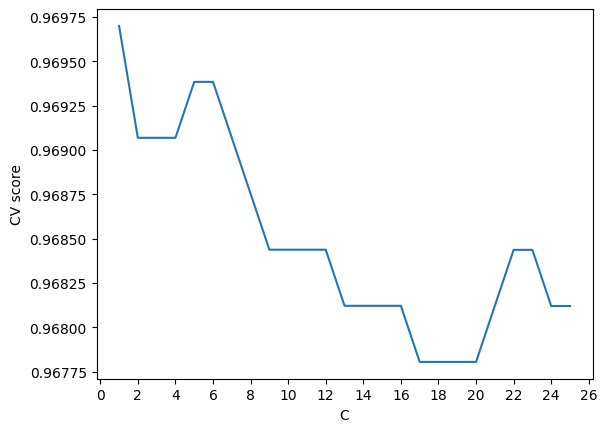

In [18]:
C_range = range(1,26)
acc_score = []

for i in C_range:
    svc = SVC(kernel='linear', C=i)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(np.mean(scores))
    
plt.plot(C_range, acc_score)
plt.xticks(range(0,27,2))
plt.xlabel('C')
plt.ylabel('CV score')
plt.show()

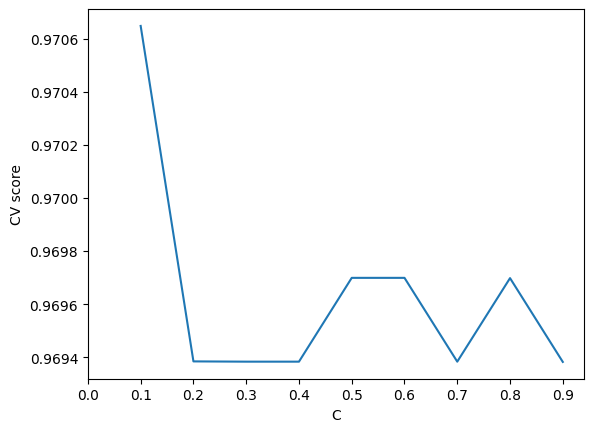

In [19]:
C_range = np.arange(0.1, 1, 0.1)
acc_score = []

for i in C_range:
    svc = SVC(kernel='linear', C=i)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(np.mean(scores))
    
plt.plot(C_range, acc_score)
plt.xticks(np.arange(0,1,0.1))
plt.xlabel('C')
plt.ylabel('CV score')
plt.show()

### Taking kernel as rbf and taking different values gamma
Technically, the gamma parameter is the inverse of the standard deviation of the RBF kernel (Gaussian function), which is used as similarity measure between two points. Intuitively, a small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other

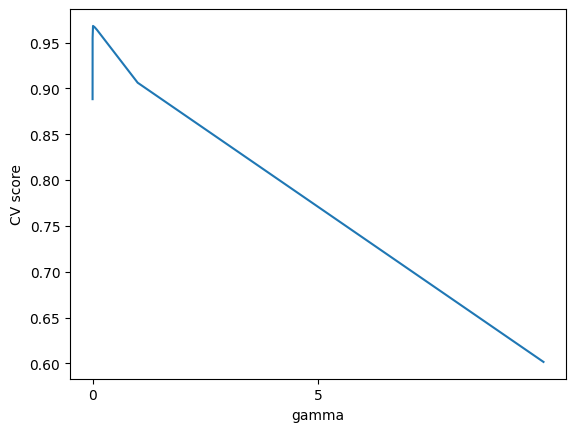

In [20]:
gamma_range = [0.0001, 0.001, 0.01, 0.05, 0.1, 1, 10]
acc_score = []
for i in gamma_range:
    svc = SVC(kernel='rbf', gamma=i)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(np.mean(scores))
    
plt.plot(gamma_range,acc_score)
plt.xticks(np.arange(0.0001,10,5))
plt.xlabel('gamma')
plt.ylabel('CV score')
plt.show()

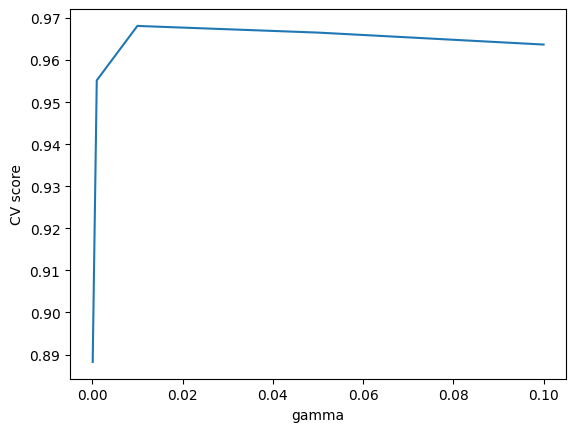

In [21]:
gamma_range = [0.0001, 0.001, 0.01, 0.05, 0.1]
acc_score = []
for i in gamma_range:
    svc = SVC(kernel='rbf', gamma=i)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(np.mean(scores))
    
plt.plot(gamma_range,acc_score)
plt.xlabel('gamma')
plt.ylabel('CV score')
plt.show()

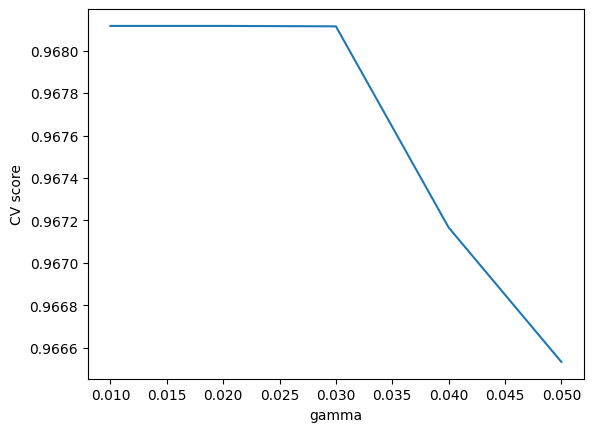

In [22]:
gamma_range = np.arange(0.01,0.06,0.01)
acc_score = []
for i in gamma_range:
    svc = SVC(kernel='rbf', gamma=i)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(np.mean(scores))
    
plt.plot(gamma_range,acc_score)
plt.xlabel('gamma')
plt.ylabel('CV score')
plt.show()

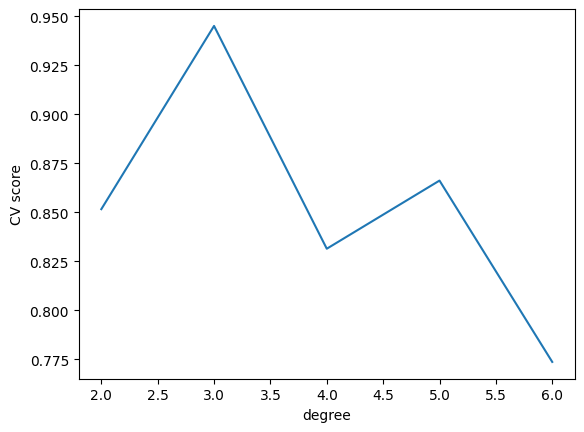

In [23]:
degree = [2,3,4,5,6]
acc_score = []
for i in degree:
    svc = SVC(kernel='poly', degree=i)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(np.mean(scores))
    
plt.plot(degree,acc_score)
plt.xlabel('degree')
plt.ylabel('CV score')
plt.show()

### Now performing SVM by considering hyperparameters for respective kernels

0.9747634069400631



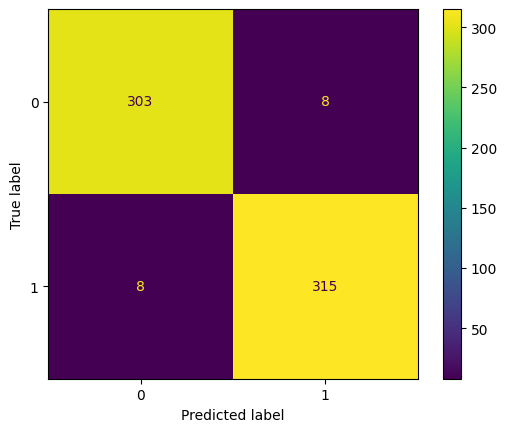

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

svc = SVC(kernel='linear', C=0.1)
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(Y_test,y_pred))
print()
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)

0.9668769716088328


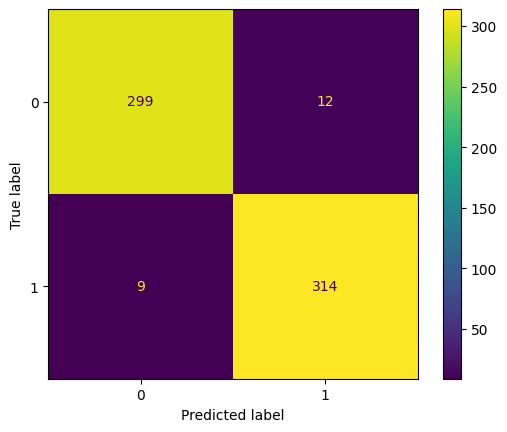

In [25]:
svc = SVC(kernel='rbf', gamma=0.01)
svc.fit(X_train,Y_train)
y_pred=svc.predict(X_test)
print(accuracy_score(Y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)

0.9589905362776026


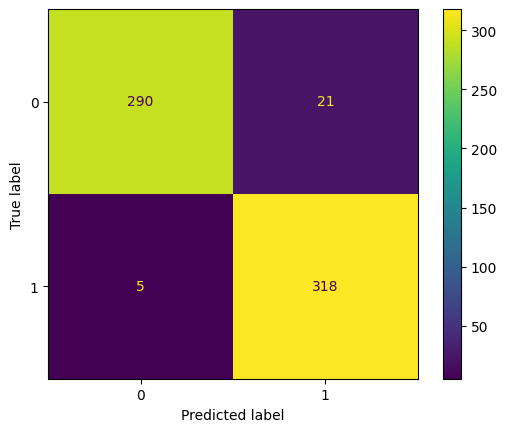

In [26]:
svc = SVC(kernel='poly', degree=3)
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(Y_test,y_pred))
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)

### Hyperparameter tuning with GridsearchCV

In [27]:
from sklearn.model_selection import GridSearchCV
svc = SVC()
tuned_params = [{'C':(np.arange(0.1,1,0.1)), 'kernel':['linear']},
                {'C':(np.arange(0.1,1,0.1)), 'kernel':['rbf'], 'gamma':(np.arange(0.01,0.09,0.01))},
                {'C':(np.arange(0.1,1,0.1)), 'kernel':['poly'], 'degree':[2,3,4]}]

svm_model = GridSearchCV(svc, tuned_params, cv=10, scoring='accuracy')

In [28]:
svm_model.fit(X_train,Y_train)
print(svm_model.best_score_)

0.9814556036226696


In [29]:
print(svm_model.best_params_)

{'C': 0.9, 'gamma': 0.05, 'kernel': 'rbf'}


In [30]:
y_pred = svm_model.predict(X_test)
print(accuracy_score(Y_test,y_pred))

0.9779179810725552
